# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from google.colab import files

# Loading the dataset and learning the data

In [2]:
uploaded = files.upload()

Saving New_Airline_Delay_Cause.csv to New_Airline_Delay_Cause.csv


In [3]:
df = pd.read_csv('New_Airline_Delay_Cause.csv')

In [4]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [5]:
df.tail(1)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
171222,2013,8,F9,Frontier Airlines Inc.,MTJ,"Montrose/Delta, CO: Montrose Regional",1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.shape

(171223, 21)

In [7]:
df.size

3595683

In [8]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

# Datatypes and descriptive stats

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171223 entries, 0 to 171222
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 171223 non-null  int64  
 1   month                171223 non-null  int64  
 2   carrier              171223 non-null  object 
 3   carrier_name         171223 non-null  object 
 4   airport              171223 non-null  object 
 5   airport_name         171223 non-null  object 
 6   arr_flights          171223 non-null  float64
 7   arr_del15            171223 non-null  float64
 8   carrier_ct           171223 non-null  float64
 9   weather_ct           171223 non-null  float64
 10  nas_ct               171223 non-null  float64
 11  security_ct          171223 non-null  float64
 12  late_aircraft_ct     171223 non-null  float64
 13  arr_cancelled        171223 non-null  float64
 14  arr_diverted         171223 non-null  float64
 15  arr_delay        

In [10]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,171223.000000,171223.000000,171223.000000,171223.000000,171223.000000,171223.000000,171223.000000,171223.000000,171223.000000,171223.000000,171223.00000,171223.000000,171223.000000,171223.000000,171223.000000,171223.000000,171223.000000
mean,2018.549739,6.495284,362.946427,66.434387,20.821272,2.253015,19.404125,0.157283,23.798736,7.527686,0.86430,4244.513617,1438.889034,222.827365,921.743218,7.391478,1653.658299
std,2.891314,3.441753,993.408638,179.540694,50.339895,7.318176,61.708181,0.717809,72.431750,43.676378,3.77497,12625.199210,4217.885488,821.537321,3425.391326,41.803971,5224.663092
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,3.000000,50.000000,6.000000,2.170000,0.000000,1.000000,0.000000,1.240000,0.000000,0.00000,336.000000,111.000000,0.000000,35.000000,0.000000,66.000000
50%,2019.000000,7.000000,101.000000,17.000000,6.410000,0.400000,3.930000,0.000000,5.000000,1.000000,0.00000,1020.000000,375.000000,18.000000,147.000000,0.000000,321.000000
75%,2021.000000,9.000000,250.000000,47.000000,17.300000,1.860000,11.730000,0.000000,15.280000,4.000000,1.00000,2888.500000,1110.000000,146.000000,478.000000,0.000000,1072.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,197.00000,438783.000000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


In [11]:
df.describe(include = 'all')

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,171223.000000,171223.000000,171223,171223,171223,171223,171223.000000,171223.000000,171223.000000,171223.000000,...,171223.000000,171223.000000,171223.000000,171223.00000,171223.000000,171223.000000,171223.000000,171223.000000,171223.000000,171223.000000
unique,NaN,NaN,21,23,391,415,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,OO,SkyWest Airlines Inc.,DTW,"Detroit, MI: Detroit Metro Wayne County",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,25521,25521,1535,1535,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2018.549739,6.495284,NaN,NaN,NaN,NaN,362.946427,66.434387,20.821272,2.253015,...,0.157283,23.798736,7.527686,0.86430,4244.513617,1438.889034,222.827365,921.743218,7.391478,1653.658299
std,2.891314,3.441753,NaN,NaN,NaN,NaN,993.408638,179.540694,50.339895,7.318176,...,0.717809,72.431750,43.676378,3.77497,12625.199210,4217.885488,821.537321,3425.391326,41.803971,5224.663092
min,2013.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,3.000000,NaN,NaN,NaN,NaN,50.000000,6.000000,2.170000,0.000000,...,0.000000,1.240000,0.000000,0.00000,336.000000,111.000000,0.000000,35.000000,0.000000,66.000000
50%,2019.000000,7.000000,NaN,NaN,NaN,NaN,101.000000,17.000000,6.410000,0.400000,...,0.000000,5.000000,1.000000,0.00000,1020.000000,375.000000,18.000000,147.000000,0.000000,321.000000
75%,2021.000000,9.000000,NaN,NaN,NaN,NaN,250.000000,47.000000,17.300000,1.860000,...,0.000000,15.280000,4.000000,1.00000,2888.500000,1110.000000,146.000000,478.000000,0.000000,1072.000000


# Checking for null values

In [12]:
mv = df.isnull().sum()
mp = (mv / len(df))*100
mp = mp.round(2)
data = pd.DataFrame({'Missing Values :' : mv, 'Missing Percent : ' : mp})
data

,Missing Values :,Missing Percent :
year,0,0.0
month,0,0.0
carrier,0,0.0
carrier_name,0,0.0
airport,0,0.0
airport_name,0,0.0
arr_flights,0,0.0
arr_del15,0,0.0
carrier_ct,0,0.0
weather_ct,0,0.0


# Correlation analysis

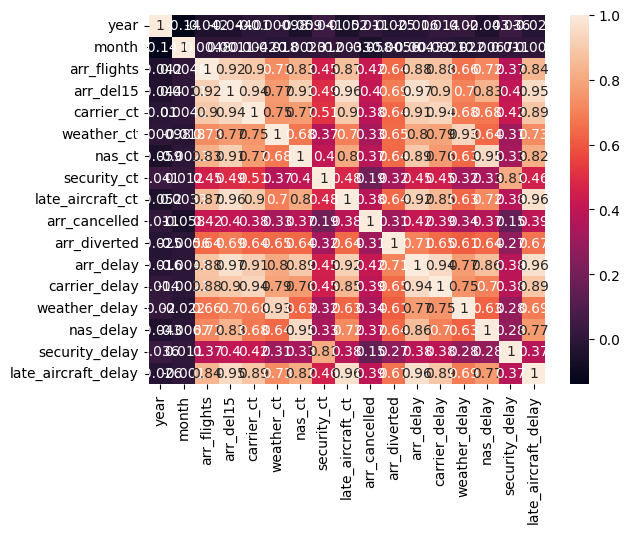

In [13]:
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.show()

# splitting leaky and non leaky columns

In [14]:
leaky_direct = [
    'arr_delay',
    'arr_del15',
    'carrier_delay',
    'weather_delay',
    'nas_delay',
    'security_delay',
    'late_aircraft_delay'
]

leaky_post_flight = [
    'arr_cancelled',
    'arr_diverted',
    'carrier_ct',
    'weather_ct',
    'nas_ct',
    'security_ct',
    'late_aircraft_ct'
]

leaky_metadata = [
    'carrier_name',
    'airport_name'
]

leaky_data = leaky_direct + leaky_post_flight + leaky_metadata


In [15]:
non_leaky_data = ['year', 'month', 'carrier', 'airport', 'arr_flights']


# Checking for outliers in non leaky datas and target

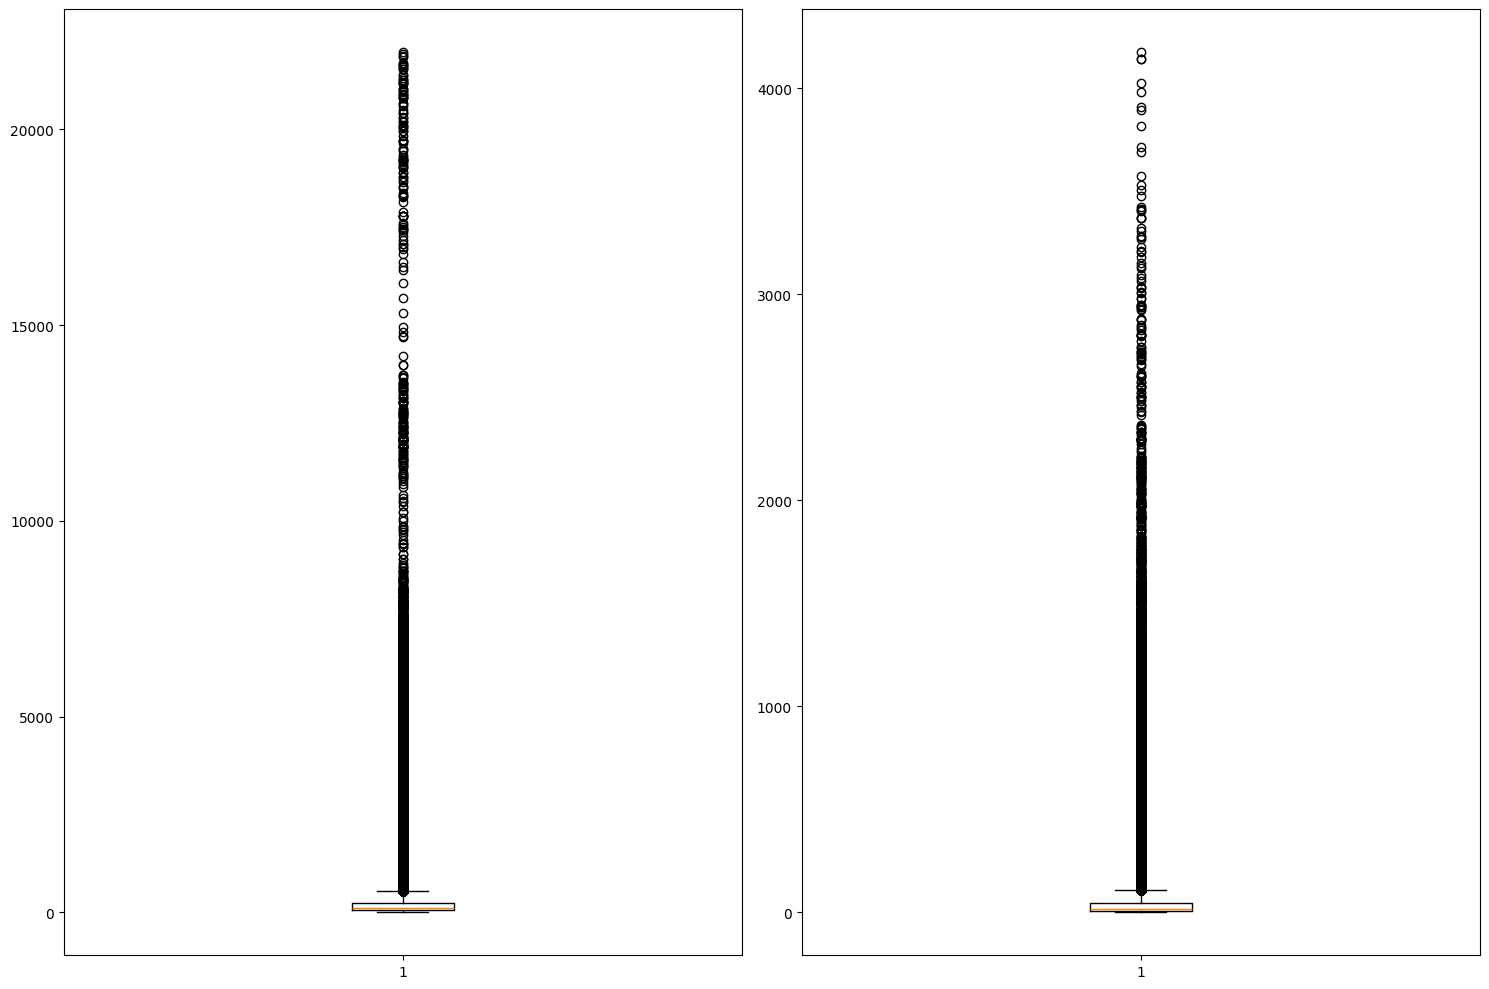

In [16]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.boxplot(df['arr_flights'])
plt.subplot(1, 2, 2)
plt.boxplot(df['arr_del15'])
plt.tight_layout()
plt.show()

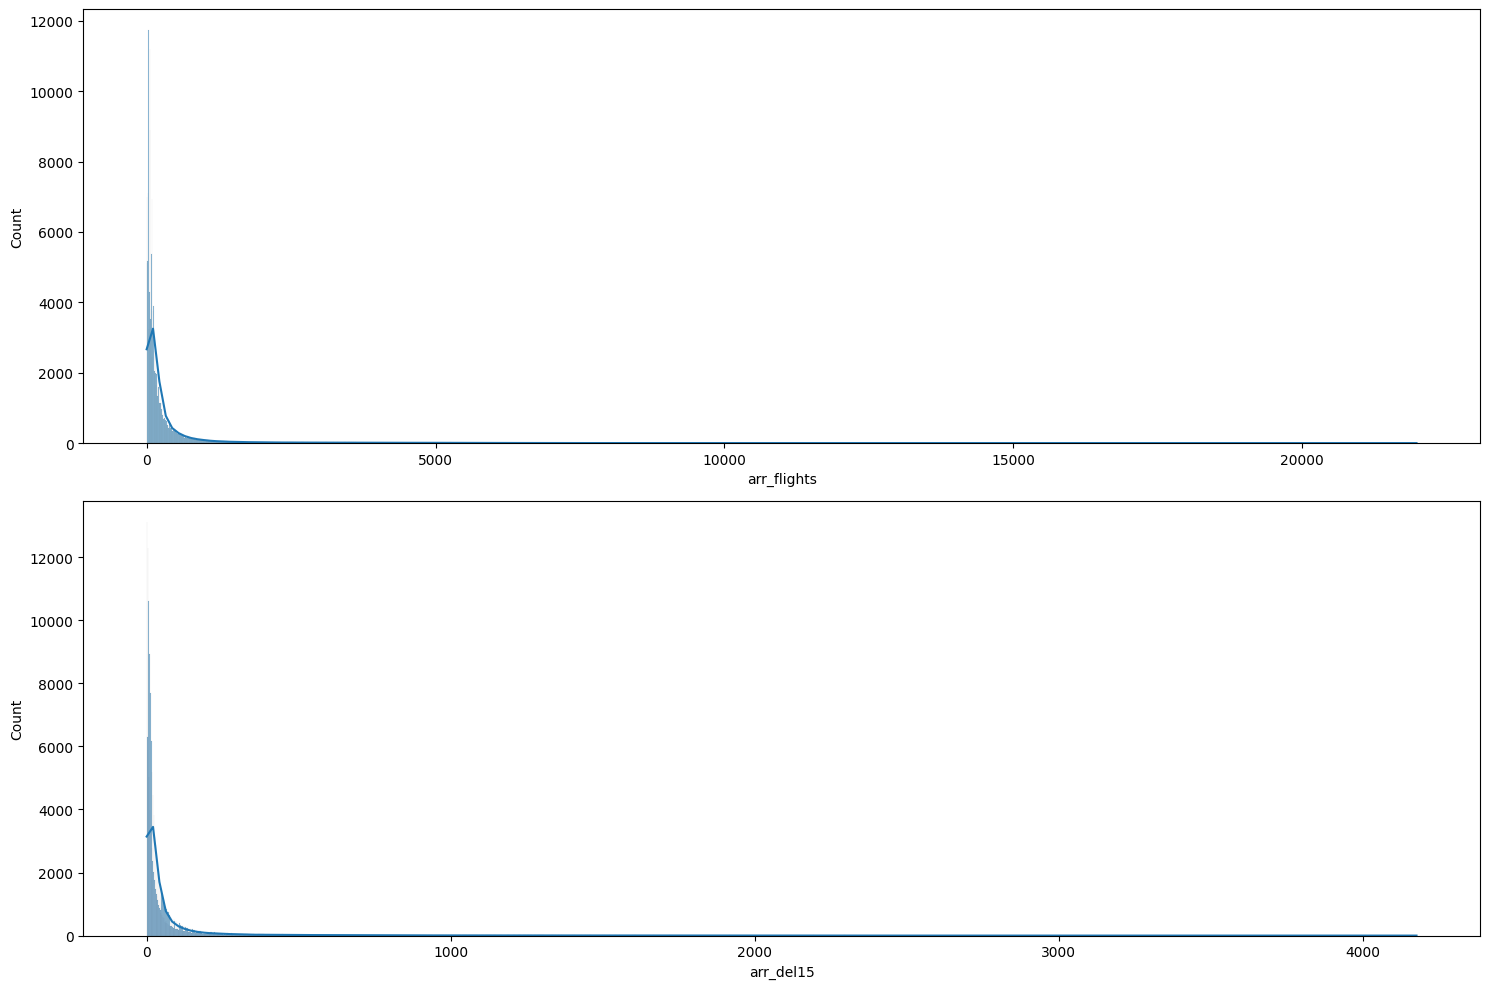

In [17]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.histplot(df['arr_flights'], kde = True)
plt.subplot(2, 1, 2)
sns.histplot(df['arr_del15'], kde = True)
plt.tight_layout()
plt.show()

In [18]:
numeric_cols = ['arr_flights', 'arr_del15']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\n{col} — Number of outliers: {outliers.shape[0]}")




arr_flights — Number of outliers: 21642

arr_del15 — Number of outliers: 21148


 # Outliers in columns like 'arr_flights' were retained because they reflect real-world scenarios such as high traffic or extreme delays. Instead of removing them, transformations like log1p will be used to reduce their influence on the model while preserving important information.

# Converting the arr_del15 column to binary

In [19]:
df['arr_del15'] = df['arr_del15'].apply(lambda x: 1 if x <= 15 else 0)

In [20]:
df['arr_del15'].value_counts()

,count
arr_del15,
0,90859
1,80364


# Since the class distribution in arr_del15 is relatively balanced,there is no need to apply oversampling or undersampling techniques.

In [21]:
X = df[['year', 'month', 'carrier', 'airport', 'arr_flights']]
y = df['arr_del15']

In [22]:
X = pd.get_dummies(X, columns=['carrier', 'airport'], drop_first=True)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [27]:
y_pred = model.predict(X_test_scaled)

# Cross valid score

In [28]:
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

print("Cross-validation F1 scores:", cv_scores)
print("Mean CV F1 score:", np.mean(cv_scores))
print("Std CV F1 score:", np.std(cv_scores))

Cross-validation F1 scores: [0.88273819 0.87605857 0.88085603 0.88060573 0.87993826]
Mean CV F1 score: 0.8800393580727166
Std CV F1 score: 0.002196740608892015


# Evaluating the model using confusion matrix, f1 score, precision score and recall score

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score

In [30]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[23223,  3981],
       [ 2292, 21871]])

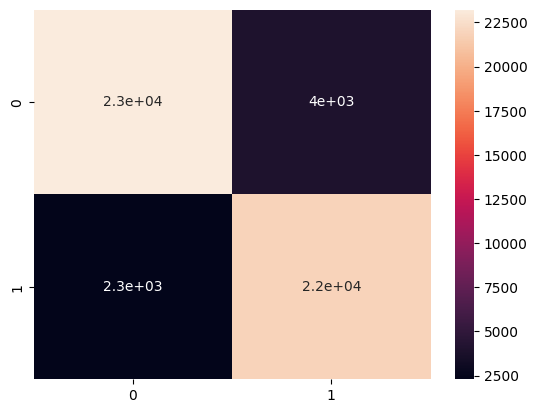

In [31]:
sns.heatmap(cf, annot = True)
plt.show()

In [32]:
precision_score(y_test,y_pred)

0.8460080457991644

In [33]:
f1_score(y_test, y_pred)

0.8745776267119864

In [34]:
recall_score(y_test, y_pred)

0.9051442287795389

# Random forest classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    random_state = 42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [37]:
y_pred = rf.predict(X_test_scaled)

# Cross valid score

In [38]:
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)

print("Cross-validation F1 scores:", cv_scores)
print("Mean CV F1 score:", np.mean(cv_scores))
print("Std CV F1 score:", np.std(cv_scores))

Cross-validation F1 scores: [0.88507425 0.87651746 0.87972967 0.88331734 0.88210755]
Mean CV F1 score: 0.8813492547306888
Std CV F1 score: 0.0029763496192911423


# Evaluating the model using confusion matrix, f1 score, precision score and recall score

In [39]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[24218,  2986],
       [ 3395, 20768]])

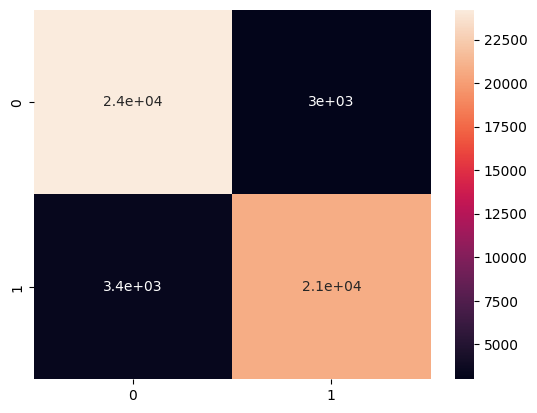

In [40]:
sns.heatmap(cf, annot = True)
plt.show()

In [41]:
precision_score(y_test,y_pred)

0.8742948556032668

In [42]:
f1_score(y_test, y_pred)

0.866832230732308

In [43]:
recall_score(y_test, y_pred)

0.8594959235194305

# Decision tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [46]:
y_pred = dt.predict(X_test_scaled)

# Cross valid score

In [47]:
cv_scores = cross_val_score(dt, X_train_scaled, y_train, cv=5)

print("Cross-validation F1 scores:", cv_scores)
print("Mean CV F1 score:", np.mean(cv_scores))
print("Std CV F1 score:", np.std(cv_scores))

Cross-validation F1 scores: [0.88645086 0.87643402 0.87743523 0.88290017 0.87605857]
Mean CV F1 score: 0.8798557719672994
Std CV F1 score: 0.0041170290016918154


# Evaluating the model using confusion matrix, f1 score, precision score and recall score

In [48]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[24014,  3190],
       [ 3400, 20763]])

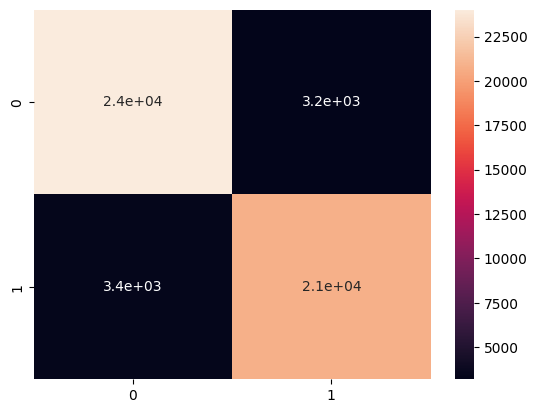

In [49]:
sns.heatmap(cf, annot = True)
plt.show()

In [50]:
precision_score(y_test,y_pred)

0.8668225274495888

In [51]:
f1_score(y_test, y_pred)

0.8630393216393715

In [52]:
recall_score(y_test, y_pred)

0.8592889955717419

# Logistic Regression achieved the best balance with the highest F1 score (0.875) and recall (0.905), meaning it detects most delays effectively. Random Forest showed slightly better cross-validation stability and higher precision (0.874), reducing false alarms but missing more delays. Overall, Logistic Regression is the preferred model for maximizing delay detection with strong overall performance.